## Company Stocks Analysis

In [25]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

Importing dataset

In [7]:
stocks_data = pd.read_csv("company_stocks.csv")

In [8]:
stocks_data.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
1,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
2,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
3,Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
4,Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001


Since our data doesn't have explicitly defined features, we'll have to create them before we proceed with the futher steps.

For this reason, we will create two features for each of these companies - Mean & Std. Dev.<br>
This will help us cluster them better and give us a more understandable analysis.

In [9]:
stocks_data['Mean'] = stocks_data.mean(axis=1)

In [10]:
stocks_data['Std_dev'] = stocks_data.std(axis=1)

In [11]:
stocks_data.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29,Mean,Std_dev
0,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000,-0.016272,0.793241
1,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001,0.044206,0.678429
2,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998,0.038733,0.946927
3,Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,...,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000,-0.019418,0.222972
4,Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,...,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001,0.012700,0.362410


Let's create a new data frame with only the company names, their means and standard deviations.

In [12]:
stocks_data.columns

Index(['Unnamed: 0', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2013-10-18', '2013-10-21', '2013-10-22', '2013-10-23', '2013-10-24',
       '2013-10-25', '2013-10-28', '2013-10-29', 'Mean', 'Std_dev'],
      dtype='object', length=966)

In [13]:
stocks_data.rename(columns = {'Unnamed: 0':'Company'}, inplace = True)

In [14]:
stocks_data.columns

Index(['Company', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2013-10-18', '2013-10-21', '2013-10-22', '2013-10-23', '2013-10-24',
       '2013-10-25', '2013-10-28', '2013-10-29', 'Mean', 'Std_dev'],
      dtype='object', length=966)

In [15]:
new_stocks_data = stocks_data.filter(items=['Company', 'Mean', 'Std_dev'])

In [16]:
new_stocks_data.head()

,Company,Mean,Std_dev
0,AIG,-0.016272,0.793241
1,American express,0.044206,0.678429
2,Boeing,0.038733,0.946927
3,Bank of America,-0.019418,0.222972
4,Canon,0.012700,0.362410


In [17]:
new_stocks_data.set_index('Company', inplace=True)

In [18]:
new_stocks_data.head()

,Mean,Std_dev
Company,,
AIG,-0.016272,0.793241
American express,0.044206,0.678429
Boeing,0.038733,0.946927
Bank of America,-0.019418,0.222972
Canon,0.012700,0.362410


### Feature Scaling

using Standard Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
std_scale = StandardScaler().fit(new_stocks_data)

In [21]:
stocks_data_scaled = std_scale.transform(new_stocks_data)

In [22]:
stocks_data_scaled[:5,]

array([[-1.4390052 ,  1.18306989],
       [ 1.18623187,  0.74485799],
       [ 0.94868666,  1.76965407],
       [-1.5755844 , -0.99351556],
       [-0.18138449, -0.46131128]])

### KMeans Clustering

Running KMeans algorithm to find the optimal number of clusters using the elbow method

In [23]:
ssq = []

for k in range(1, 11):
    kmeans_model = KMeans(n_clusters = k, random_state = 123)
    kmeans_model.fit(stocks_data_scaled)
    ssq.append(kmeans_model.inertia_)

Generating Scree plot to visualise the elbow curve

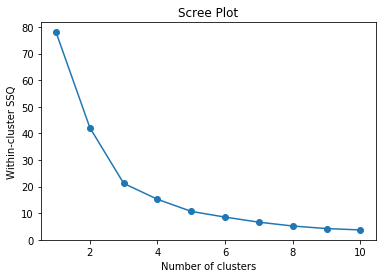

In [26]:
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSQ")
plt.title("Scree Plot")
plt.show()

#### Inference

Looking at the elbow curve above, we can observe that the curve becomes more or less linear around 4.<br>
Therefore, we pick the number we pick for clusters is 4.

Let's fit the KMeans model again with K=4

In [27]:
kmodel = KMeans(n_clusters = 4, random_state = 123)

In [28]:
kmodel.fit(stocks_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

<b>Calculating Silhouette Score</b>

In [34]:
from sklearn import metrics

In [35]:
kmeans_score = metrics.silhouette_score(stocks_data_scaled, kmodel.labels_)

In [36]:
kmeans_score

0.41909866296499887

Since a the score of 0.419 isn't the most convincing one, let's refit the model with K=3.

In [37]:
kmodel2 = KMeans(n_clusters = 3, random_state = 123)

In [38]:
kmodel2.fit(stocks_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

<b>Calculating Silhouette Score</b>

In [39]:
kmeans2_score = metrics.silhouette_score(stocks_data_scaled, kmodel2.labels_)

In [40]:
kmeans2_score

0.5377310138328623

We observe that the Silhouette Score is much better with K=3 than K=4. Therefore we'll pick 3 as the optimal number of clusters.

Make predictions for the clusters of the given dataset.

In [41]:
predicted_clusters = kmodel2.predict(stocks_data_scaled)

In [42]:
predicted_clusters[:5]

array([0, 2, 2, 1, 1], dtype=int32)

Lets visualize the data partitioned into clusters.

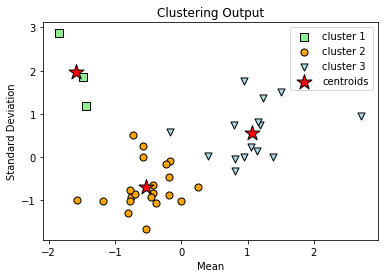

In [44]:
plt.scatter(stocks_data_scaled[predicted_clusters==0,0], stocks_data_scaled[predicted_clusters==0,1],\
            s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')

plt.scatter(stocks_data_scaled[predicted_clusters==1,0], stocks_data_scaled[predicted_clusters==1, 1],\
            s=50, c='orange',marker='o', edgecolors='black', label='cluster 2')

plt.scatter(stocks_data_scaled[predicted_clusters==2,0], stocks_data_scaled[predicted_clusters==2, 1],\
            s=50, c='lightblue',marker='v', edgecolors='black', label='cluster 3')

plt.scatter(kmodel2.cluster_centers_[:,0], kmodel2.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')

plt.legend(scatterpoints=1)
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")

plt.title("Clustering Output")
plt.show()

### Inference

By observing the above clusters, we can make certain inferences of the stock's performance.<br>
<b>Cluster 1</b> - High Standard Deviation with Negative Mean. These stocks must be completely avoided. Going by their mean value, we can safely assume that it'll take these stocks at least 3 quarters to show a positive turn around.<br>
<b>Cluster 2</b> - Negative Standard Deviation with Negative Mean. These stocks should be watched. Since they're quite close to 0 or between 0 & -1 on both axes, there's a good chance that they might show a positive turn around within a quarter or two.<br>
<b>Cluster 3</b> - Moderate Standard Deviation with High Positive Mean. INVEST! These stocks are in the positive scale and should be chosen for investment.<br>

Accordingly, an analyst may conclude following labels for each cluster: <br>
<b>Cluster 1</b> : Avoid<br>
<b>Cluster 2</b> : Watch<br>
<b>Cluster 3</b> : Invest<br>

We can insert these labels back into our dataset.

In [45]:
import numpy as np
predictions_relabelled = np.where(predicted_clusters==0, "Avoid", \
                                  np.where(predicted_clusters==1, "Watch", "Invest"))
new_stocks_data['category'] = pd.Series(predictions_relabelled, index=new_stocks_data.index)

In [46]:
new_stocks_data.head()

,Mean,Std_dev,category
Company,,,
AIG,-0.016272,0.793241,Avoid
American express,0.044206,0.678429,Invest
Boeing,0.038733,0.946927,Invest
Bank of America,-0.019418,0.222972,Watch
Canon,0.012700,0.362410,Watch
